# Can Deep Reinforcement Learning Solve Erdos-Selfridge-Spencer Games?

In [1]:
import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.results_plotter import load_results, ts2xy

from defense import Defense
from attack import Attack
from utils import extract_results, simulate_trainedAttackerDefender

log_dir_def = "/tmp/gym/"
log_dir_att = "/tmp/gym_attack/" 

## Implementation of Theorem 1

In [2]:
#The number of levels
K = 3
print('The number of levels: ', K)
#The number of pieces
N = 2 ** K + 2
print('The number of pieces: {} >= 8 (2 ^ 3)\n'.format(N))

def func_the1(K, N):
    lev_state = np.zeros((K+1, N)).astype(int)
    #All the pieces are at level 0
    lev_state[K] = np.ones(N)
    done = False
    current_level = K

    #1: Present A, 2: Present B
    while not done:
        #Naive attacker/ every piece has the probability of 1/2 to belong to A/B
        count = np.where(lev_state[current_level] == 1)[0]
        A = []
        B = []
        for i in list(count):
            indx = np.random.choice(2)
            if indx == 0:
                A.append(i)
            else:
                B.append(i)
        for i in A:
            lev_state[current_level, i] = 1
        for i in B:
            lev_state[current_level, i] = 2

        #Choosing which set to keep (the set with the low length)
        if(len(A) < len(B)):
            lev_state[current_level - 1][:len(A)] = 1
        else:
            lev_state[current_level - 1][:len(B)] = 1
        lev_state[current_level] = np.zeros(N)
        current_level -= 1
        if(np.sum(lev_state) == 0):
            result = 'Defender'
            done = True
        elif np.sum(lev_state[0]) >= 1:
            result = 'Attacker'
            done = True
    return result

result = []
for i in range(100):
    result.append(func_the1(K, N))
print('Attacker: {}'.format(result.count('Attacker')))
print('Defender: {}'.format(result.count('Defender')))

The number of levels:  3
The number of pieces: 10 >= 8 (2 ^ 3)

Attacker: 15
Defender: 85


In [3]:
K = 3
N = 2 ** K - 2
result = []
for i in range(100):
    result.append(func_the1(K, N))
print('Attacker: {}'.format(result.count('Attacker')))
print('Defender: {}'.format(result.count('Defender')))

Attacker: 0
Defender: 100


## Defense

Model Initialized !
PPO LEARNING DONE DEFENSE
Model Initialized !
995 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.86
1998 timesteps
Best mean reward: -0.86 - Last mean reward per episode: 0.84
2996 timesteps
Best mean reward: 0.84 - Last mean reward per episode: 0.96
3998 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.94
4996 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.94
5993 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
6995 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.88
7995 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.90
8997 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
9999 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
DQN LEARNING DONE DEFENSE
Model Initialized !
4995 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.20
9999 timesteps
Best mean reward: -0.20 - Last mean reward per

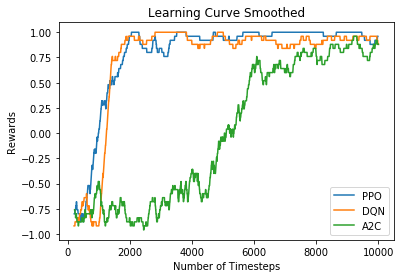

In [4]:
nb_episode_train = 10000

defense1 = Defense('PPO', K=10, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense1.learn(nb_episode_train)
x1, y1 = extract_results(log_dir_def)


defense2 = Defense('DQN', K=10, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense2.learn(nb_episode_train)
x2, y2 = extract_results(log_dir_def)

defense3 = Defense('A2C', K=10, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense3.learn(nb_episode_train)
x3, y3 = extract_results(log_dir_def)

plt.figure()
plt.plot(x1, y1, label='PPO')
plt.plot(x2, y2, label='DQN')
plt.plot(x3, y3, label='A2C')
plt.xlabel('Number of Timesteps')
plt.ylabel('Rewards')
plt.title("Learning Curve Smoothed")
plt.legend()
plt.show()

Defender turn..
Defender keeps: [0 0 0 0 0 0 0 0 0 0 0]


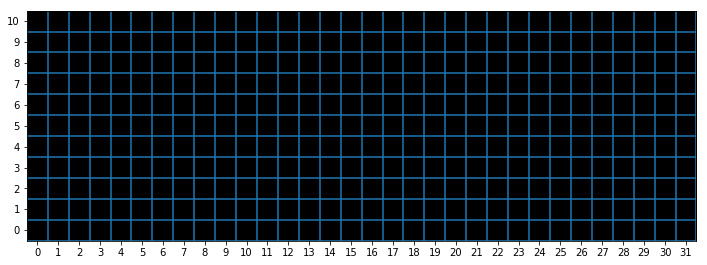

Defender wins!!


In [5]:
# Game's scenario with DQN algorithm
defense2.simulate_trainedDefender()

Episode 0#; 	 Nb of steps: 11; 	 Reward: [1.].
Episode 100#; 	 Nb of steps: 11; 	 Reward: [1.].
Episode 200#; 	 Nb of steps: 8; 	 Reward: [1.].
Episode 300#; 	 Nb of steps: 9; 	 Reward: [1.].
Episode 400#; 	 Nb of steps: 11; 	 Reward: [1.].
Episode 500#; 	 Nb of steps: 10; 	 Reward: [1.].
Episode 600#; 	 Nb of steps: 11; 	 Reward: [1.].
Episode 700#; 	 Nb of steps: 10; 	 Reward: [1.].
Episode 800#; 	 Nb of steps: 9; 	 Reward: [1.].
Episode 900#; 	 Nb of steps: 9; 	 Reward: [1.].


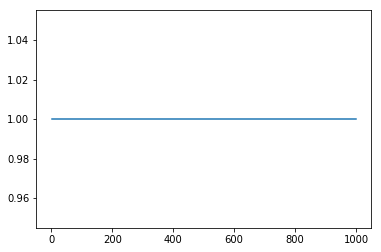

In [6]:
defense2.run(1000)
plt.plot(range(1, defense2.nb_episodes+1), defense2.reward)
plt.show()

## Attack 

Model Initialized !
PPO LEARNING DONE ATTACK
Model Initialized !
998 timesteps
Best mean reward: -inf - Last mean reward per episode: -1.00
1999 timesteps
Best mean reward: -1.00 - Last mean reward per episode: 0.42
2998 timesteps
Best mean reward: 0.42 - Last mean reward per episode: 0.90
3998 timesteps
Best mean reward: 0.90 - Last mean reward per episode: 0.92
4998 timesteps
Best mean reward: 0.92 - Last mean reward per episode: 0.90
5998 timesteps
Best mean reward: 0.92 - Last mean reward per episode: 0.92
6998 timesteps
Best mean reward: 0.92 - Last mean reward per episode: 0.98
7999 timesteps
Best mean reward: 0.98 - Last mean reward per episode: 0.94
8999 timesteps
Best mean reward: 0.98 - Last mean reward per episode: 0.94
9999 timesteps
Best mean reward: 0.98 - Last mean reward per episode: 0.84
DQN LEARNING DONE ATTACK
Model Initialized !
5000 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.86
9999 timesteps
Best mean reward: -0.86 - Last mean reward per e

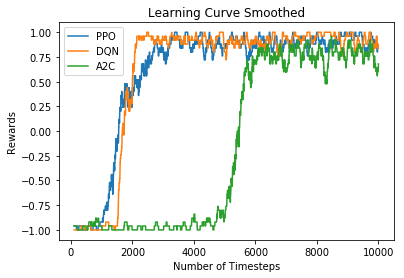

In [7]:
nb_episode_train = 10000

attack = Attack('PPO', K=10, P=1.4)

attack.learn(nb_episode_train)
x1, y1 = extract_results(log_dir_att)


attack = Attack('DQN', K=10, P=1.4)

attack.learn(nb_episode_train)
x2, y2 = extract_results(log_dir_att)

attack = Attack('A2C', K=10, P=1.4)

attack.learn(nb_episode_train)
x3, y3 = extract_results(log_dir_att)

plt.figure()
plt.plot(x1, y1, label='PPO')
plt.plot(x2, y2, label='DQN')
plt.plot(x3, y3, label='A2C')
plt.xlabel('Number of Timesteps')
plt.ylabel('Rewards')
plt.title("Learning Curve Smoothed")
plt.legend()
plt.show()

Defender turn..
Defender keeps: [0 0 0 0 0 0 0 0 0 1 0]


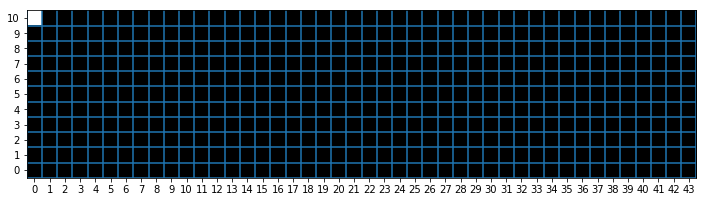

Attacker wins!!


In [8]:
attack.simulate_trainedAttacker()

Episode 0#; 	 Nb of steps: 3; 	 Reward: [1.].
Episode 100#; 	 Nb of steps: 3; 	 Reward: [1.].
Episode 200#; 	 Nb of steps: 3; 	 Reward: [-1.].
Episode 300#; 	 Nb of steps: 3; 	 Reward: [1.].
Episode 400#; 	 Nb of steps: 4; 	 Reward: [1.].
Episode 500#; 	 Nb of steps: 3; 	 Reward: [1.].
Episode 600#; 	 Nb of steps: 4; 	 Reward: [1.].
Episode 700#; 	 Nb of steps: 3; 	 Reward: [1.].
Episode 800#; 	 Nb of steps: 3; 	 Reward: [1.].
Episode 900#; 	 Nb of steps: 3; 	 Reward: [1.].


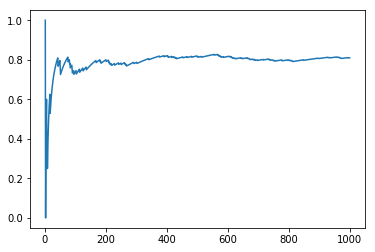

In [9]:
attack.run(1000)
plt.plot(range(1, attack.nb_episodes+1), attack.reward)
plt.show()

## Trained AttackerDefender

In [10]:
nb_episode_train = 10000

defense = Defense('DQN', K=10, P=0.7, adverse_set_prob=0.0, disj_supp_prob=0.0)
defense.learn(nb_episode_train)

attack = Attack('DQN', K=10, P=1.4)
attack.learn(nb_episode_train)

Model Initialized !
998 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.30
1995 timesteps
Best mean reward: -0.30 - Last mean reward per episode: 0.94
2998 timesteps
Best mean reward: 0.94 - Last mean reward per episode: 0.92
3998 timesteps
Best mean reward: 0.94 - Last mean reward per episode: 0.90
4997 timesteps
Best mean reward: 0.94 - Last mean reward per episode: 1.00
5998 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.98
6999 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.94
7996 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.98
8996 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.92
9994 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 1.00
DQN LEARNING DONE DEFENSE
Model Initialized !
999 timesteps
Best mean reward: -inf - Last mean reward per episode: -1.00
1999 timesteps
Best mean reward: -1.00 - Last mean reward per episode: 0.58
2999 timesteps
Best mean reward:

Defender turn..
Defender keeps: [0 0 0 0 0 0 0 0 0 0 0]


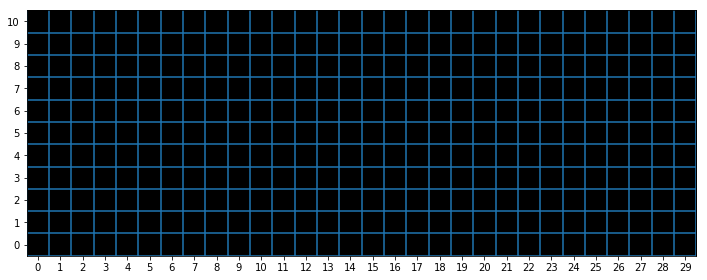

Defender wins!!


In [13]:
simulate_trainedAttackerDefender(attack, defense, 0.5)

Defender turn..
Defender keeps: [0 0 0 0 0 0 0 0 0 1 0]


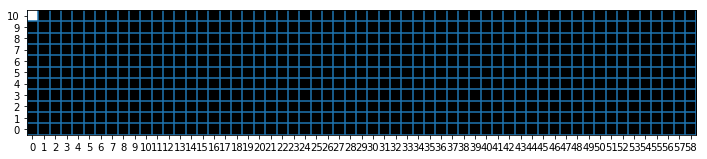

Attacker wins!!


In [12]:
simulate_trainedAttackerDefender(attack, defense, 1.5)